First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeInd

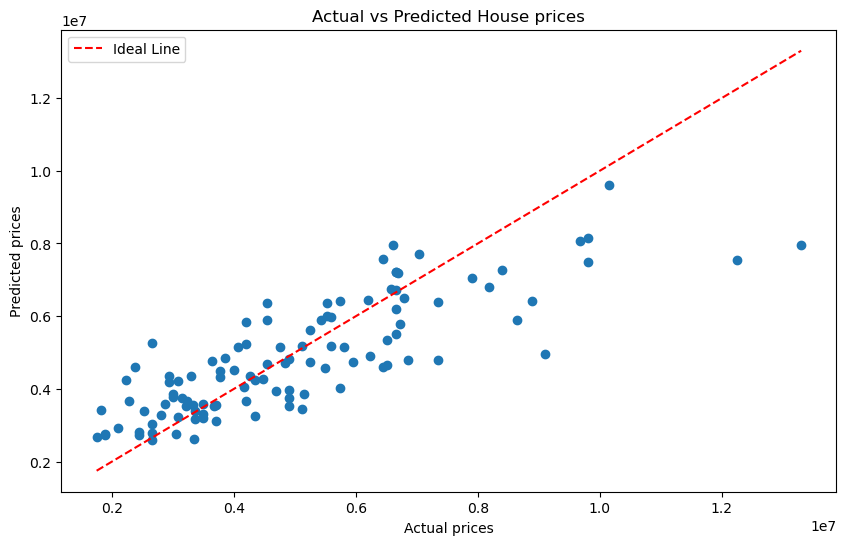

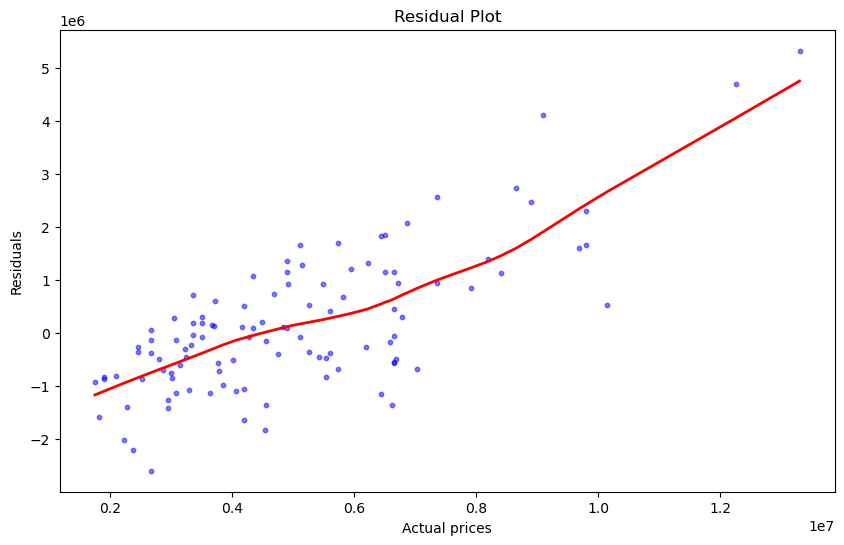

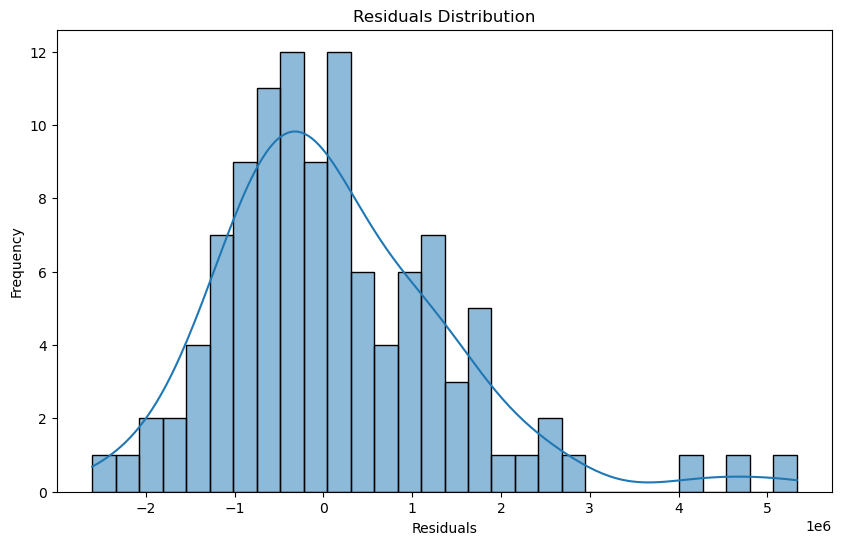


Model Coefficients:
                                   Coefficient
area                             519552.416340
bedrooms                          57349.559419
bathrooms                        521879.027748
stories                          349251.438906
parking                          192005.953667
mainroad_no                     -183959.973840
mainroad_yes                     183959.973840
guestroom_no                    -115805.018588
guestroom_yes                    115805.018588
basement_no                     -195125.588091
basement_yes                     195125.588091
hotwaterheating_no              -342324.942669
hotwaterheating_yes              342324.942669
airconditioning_no              -395713.367922
airconditioning_yes              395713.367922
prefarea_no                     -314945.282657
prefarea_yes                     314945.282657
furnishingstatus_furnished       180175.626604
furnishingstatus_semi-furnished   53293.809019
furnishingstatus_unfurnished    -233469

In [1]:
# Project Title: Predicting House Prices with Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset
df = pd.read_csv('housing_prices.csv')

# Step 2: Explore the data
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Step 3: Data Cleaning
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

df = df.dropna(subset=['price'])  # Drop rows with missing 'price'

# Fill missing values for numeric columns (mean)
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing values for categorical columns (mode)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3.1: Convert 'yes'/'no' columns into numeric values
yes_no_columns = ['is_sold']  # Replace with actual columns if needed
for col in yes_no_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

# Step 4: Feature Selection
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Step 5: Data Preprocessing
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical and categorical features
num_transformer = StandardScaler()

# For scikit-learn >= 1.2, use `sparse_output` instead of `sparse`
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated here for newer versions of scikit-learn

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build a pipeline with preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Step 11: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Line')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted House prices')
plt.legend()
plt.show()

# 11.2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2}, scatter_kws={'s': 10, 'color': 'blue', 'alpha': 0.5})
plt.title('Residual Plot')
plt.xlabel('Actual prices')
plt.ylabel('Residuals')
plt.show()

# 11.3: Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Step 12: Coefficients of the Model
coefficients = model.named_steps['regressor'].coef_

# Get feature names from the column transformer after one-hot encoding
ohe_feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
feature_names = np.concatenate([num_features, ohe_feature_names])

# Creating a DataFrame for the coefficients
coeff_df = pd.DataFrame(coefficients, feature_names, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)
